# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> <b>Kruti Raval</b> </font>

# Introduction

The main objective of this assignment is to gain proper understanding and solve regression problems using the linear model as a part of supervised learning $$ f: \mathcal{X} \rightarrow y $$ where X is the input and y is the output. The goal we want to acheive in this problem is to <b>find a best fit</b> on all the data. Training is given to the models to gain expected output by fitting the training samples into our models. The aim here is to apply different learning algorithms on the Regression dataset and then predict accurate output from our labeled input by training it. Linear model is the dot product between two vectors which can be represented as follows:

$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where w is a weight vector and x is an input vector. 

A one dimensional vector represents a straight line and so it is called <b>linear</b>.This model does not more complexity so it's represntation is also simple.Thus for the assignment we need to generate the output values of 'y' as close as we can to the target outputs. For that we will visualize the data and understand the plots from the dataset, perform necessary validations,cleaning and preprossesing of the data. we will do dimentionality reduction or feature scaling as well if needed. Different methods of linear models like <b>LS (least-squares) and LMS (Least-mean-squares)</b> will be applied to achieve the best fit line and the desired results. At the end, comparision of both the methods and algorithms would be made for the better understanding and optimality of the Linear Models.



# Data

### Description

The dataset named **Physicochemical Properties of Protein Tertiary Structure** is used for regression which has 45,730 samples and 10 feature values. The dataset shows the protein structure. Using this dataset and infering results from it, we can get a better understanding and analysis of protein structures and regression models for Root Mean Square Deviation (RMDS) prediction.

Feature values for the dataset are as follows:<br/>

RMSD -> Size of the residue.<br/>
F1 -> Total surface area.<br/>
F2 -> Non polar exposed area.<br/>
F3 -> Fractional area of exposed non polar residue.<br/>
F4 -> Fractional area of exposed non polar part of residue.<br/>
F5 -> Molecular mass weighted exposed area.<br/>
F6 -> Average deviation from standard exposed area of residue.<br/>
F7 -> Euclidian distance.<br/>
F8 -> Secondary structure penalty.<br/>
F9 -> Spacial Distribution constraints (N,K Value).<br/>

### Source

Prashant Singh Rana, ABV - Indian Institute of Information Technology & Management, Gwalior, MP, India.

In [87]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#Reading the data
dfReg = pd.read_csv("CASP.csv")
dfReg

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


## Plots for understanding the data

It is the graphical representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This is achieved via mapping between graphic marks and data values for visualization.

##### Pairplot
plots pairwise relationships in the data. A grid of Axes will be created such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes shows the uninvariate distribution for variable in that column.<br/>
data - dataframe<br/>
hue - map plots aspects in different color for identification<br/>
palette - set of colors for maping hue variables

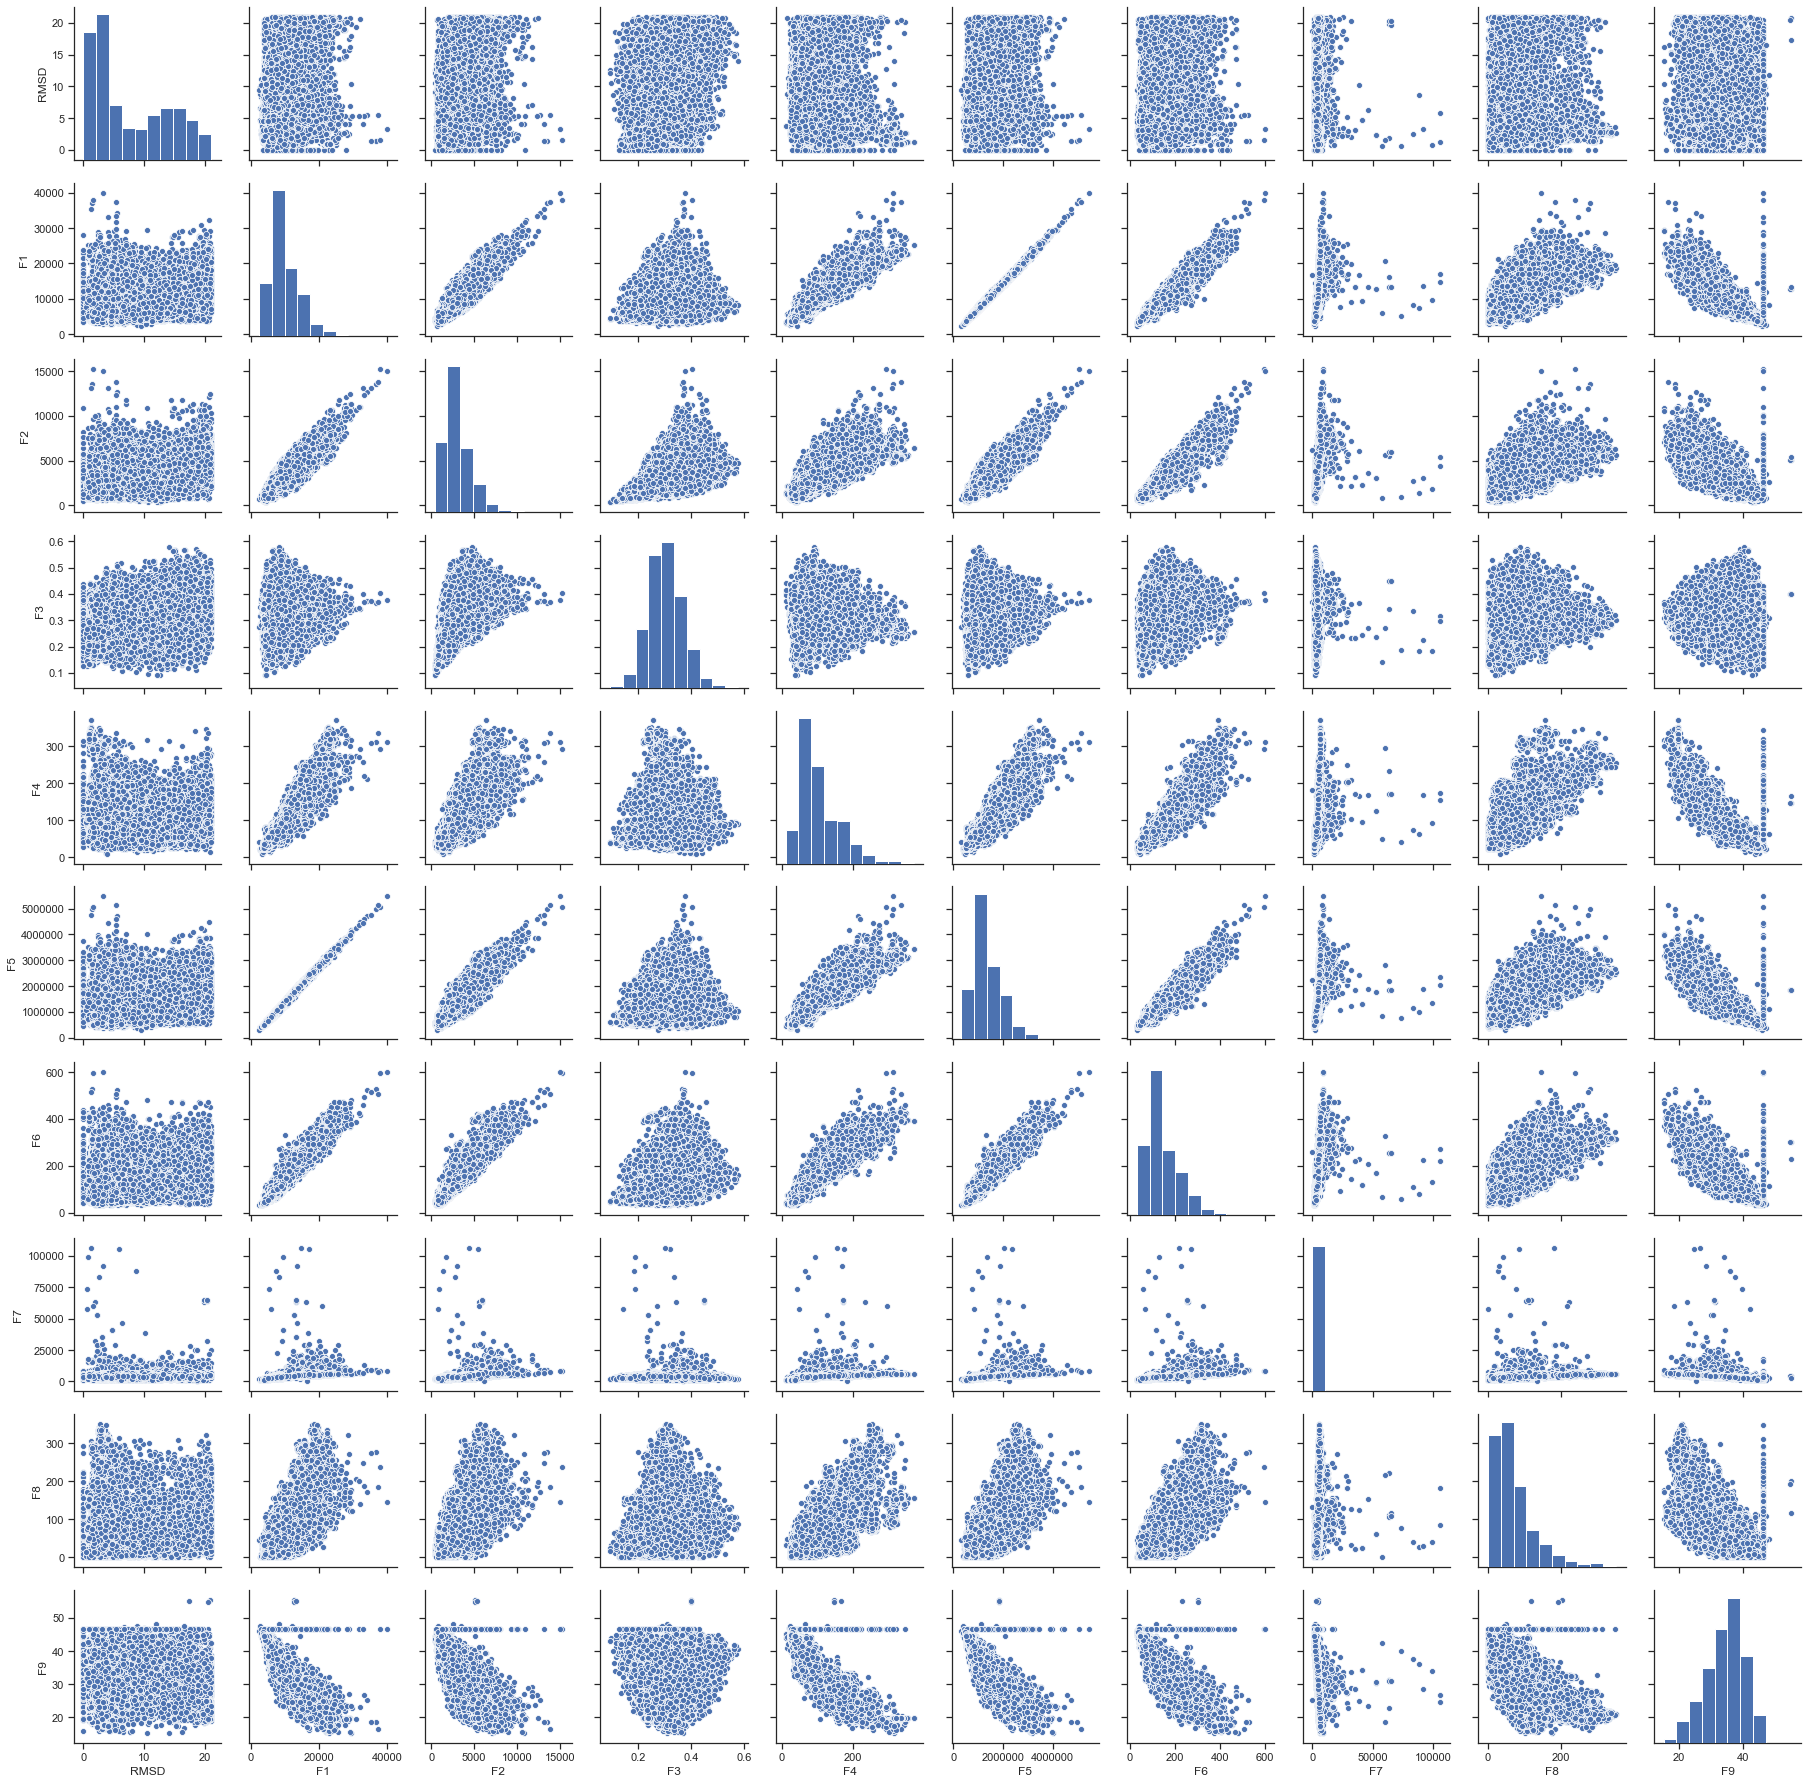

In [89]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dfReg)

##### Heatmap

It is graphical representation of data using color code and color intensity system. It represents the correlation of the feature values in the data.

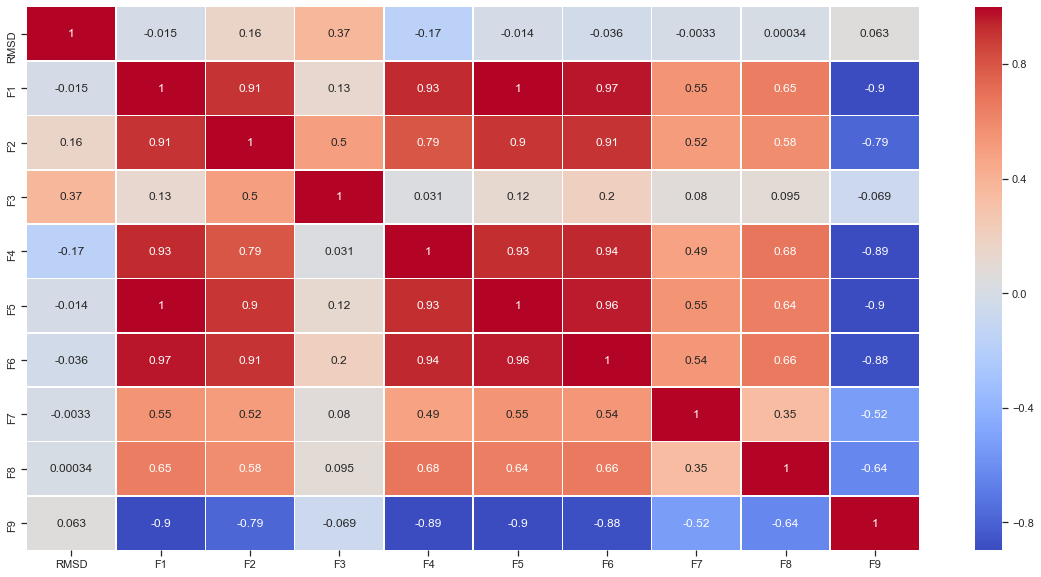

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(dfReg.corr(),annot=True, lineWidth = 0.5, cmap='coolwarm')

##### Boxplot

 It represents the statistical data on the basis of maximum, minimum and the intermediate quartiles.

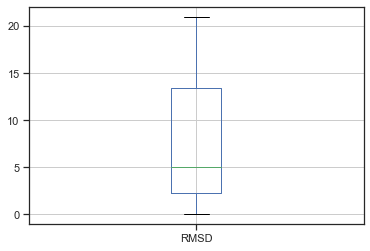

In [91]:
dfReg.boxplot(column='RMSD')

##### LMplot

 It fits regression models into conditional data sets. 

Text(0.5, 1, 'LM Plot between F1 and F5')

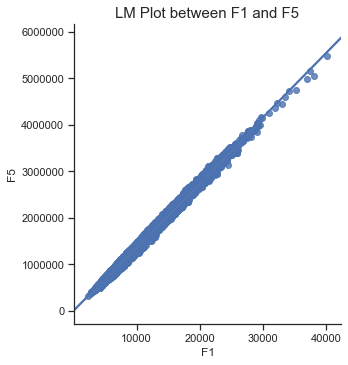

In [92]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.lmplot(x = 'F1', y = 'F5', data = dfReg, x_jitter = 0.05)
plt.title('LM Plot between F1 and F5', fontsize = 15)

##### Histogram

It shows the occurance and frequency of the data variable for each instance in the form of rectangular bars.

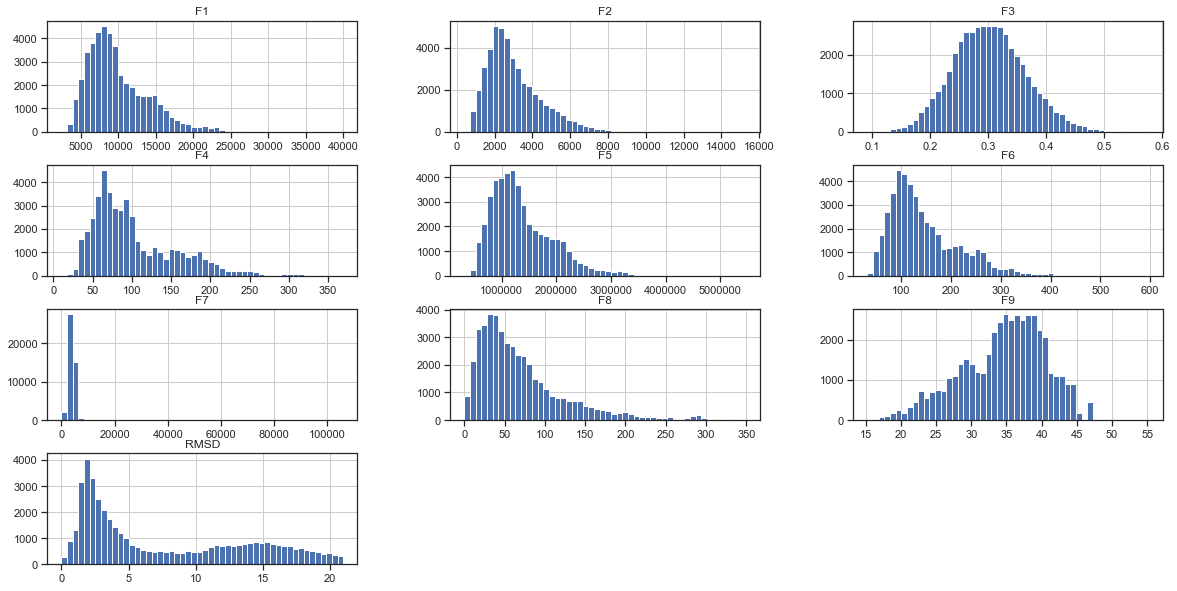

In [93]:
dfReg.hist(bins=50, figsize=(20,10))
plt.show()

## Preliminary Observation of Data

**Pairplot**: Relation between various features of dataset are visualized. Distribution of single variables as well as relation between two variables is described through this graph. From the graph we can see that all the attributes are mapped to one another showing relation to eachother. According to the relation with the target feature (RMSD), we can see the corresponding values and correlations with it for transforming the values. It also shows non linear behaviour of data.

**Heatmap**: From intensity of colors and the corresponding values between the attributes, we can know the co-relation among each variable. It shows linear behaviour of data. The diagonal shows mapping of each variable with itself and so the value is 1 i.e maximum correlation. Feature F1 and F5 have the maximum correlation (1) and Feature F1 and F9 as well as F5 and F9 have the minimum correlation (-0.9) between them as we can see from the graph.

**Boxplot**: It represents the statistical data on the basis of maximum, minimum and the intermediate quartiles. As shown in the graph, the target value RMSD lies in the range of 0 to 23, where 0 is the minimum value, 23 is the maximum target value and intermediate quartiles lies from 3 to 14. 

**LMplot**: It fits regression models into conditional data sets. On the basis of occurance of values an estimation is made and shown via the straight line to get the best value. As we have seen that Feature F1 and F5 are correlated, so the linear model is more accurate and close to the original values. 

**Histogram**: It shows frequency of the occurance of data. For each feature value, the occurance of each instance at a particular value is mapped and we can thus see the pattern and distribution of the data very precisely.

## Preprocessing the Data

Checking for the null values, non-integer values in the dataset and taking necessary actions for the same. Also, checking for the relations among different features from the plotting of data and narrowing down the features to the ones that are most important with respect to the target feature.

In [94]:
#Checking null values
dfReg.any().isnull()

RMSD    False
F1      False
F2      False
F3      False
F4      False
F5      False
F6      False
F7      False
F8      False
F9      False
dtype: bool

#### Data Cleaning

There are no null or missing values in the data set. If there were any, we could either remove the entire instance with null values or replace the null value with the mean of that attribute to clean the data.

In [95]:
#Getting information of the data
dfReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
RMSD    45730 non-null float64
F1      45730 non-null float64
F2      45730 non-null float64
F3      45730 non-null float64
F4      45730 non-null float64
F5      45730 non-null float64
F6      45730 non-null float64
F7      45730 non-null float64
F8      45730 non-null int64
F9      45730 non-null float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [96]:
# Data and value description
dfReg.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [97]:
#Finding the correlation with the target value - RMSD
correlation_matrix = dfReg.corr()
correlation_matrix["RMSD"].sort_values(ascending=False)

RMSD    1.000000
F3      0.374309
F2      0.156895
F9      0.062830
F8      0.000344
F7     -0.003339
F5     -0.013982
F1     -0.015087
F6     -0.036135
F4     -0.169771
Name: RMSD, dtype: float64

The above table shows the correlation of each feature with respect to the target feature 'RMSD' in descending order of the correlation it has with RMSD. We can infer that the relation of F4 and F6 with RMSD is least and could be removed.

In [98]:
dfReg.drop(columns=['F4', 'F6'])

,RMSD,F1,F2,F3,F5,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,1.872791e+06,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,8.034467e+05,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,1.075648e+06,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,1.210472e+06,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,1.021020e+06,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,6.727227e+05,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,8.285145e+05,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,9.165165e+05,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,1.687508e+06,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,1.023846e+06,3852.40,26,35.4140


# Method

Summary of the linear models (least-squares and LMS) and implementation of **class** *LinearModel* is explained below.
This section also includes
 - review of the linear models 
 - implementation and description of linear models

## Review

The goal we want to acheive here is to find a best fit line on all the data. So When the data is linear or our need is to have a simple solution, linear model can suggest better solutions.

$$ f(x;a,b)=ax+b $$<br/>
we can generalize this equation using the weights w by
$$
f(x; w) =  w_1 x + w_0.
$$

Considering multiple inputs and dummy value of x0 = 1, we get

$$
\begin{align}
f(x; w) &=  w_D x_D + \cdots + w_1 x_1 + w_0 \\
            &= \sum_{i=0}^{D} w_i x_i \quad\text{where } x_0 = 1\\
            &= w^\top x.
\end{align}
$$

Here, we need to reduce the distance between the actual input points and the predicted points on the line. The minimum the distance, the more accurate results. For that we define our <b>cost or error function</b> as 

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

This error function describes our need to minimize the sum of Euclidean distances between the target values and the model outputs.

### Least Squares

From the Cost/Error function, we know a function that gives the best fit for the data. Considering that function and trying to  minimize the value of that function, we can reach our goal. 

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to w to zero. 
Target values are collected in matrix <b>t</b>.
Input samples are collected in matrix <b>X</b>.

After solving the equation and taking it's derivative to get the minimum value, we get:

$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$

This is used in method of Least Squares, where all the data is plotted and a best fit line is generated by considering all the data points at once i.e least squares use all the available data for training or finding the best fit.

### Least Mean Squares

As seen in Least Squares, we consider all the available data for finding best fit. But when dealing with large data sets, this can be very costly in terms of computation. For such cases where the data is large enough, we can consider and use <b> Sequential or Online Learning</b>. In online learning process, we introduce a data point one after another, and update the parameters sequenially. Using the updated parameters that are generated, it makes a new estimation and again repeats these steps.

$$w(k+1)=w(k)−α∇Ek $$<br/>
In this equation, we start with an initial guess <b>w</b> and change it as we read more data until it converges. 
Ek is the error for the k'th sample and α is a learning rate. This is called <b>stochastic gradient descent</b> or <b>sequential gradient descent</b>.

Considering the cost equation, the gradient for the sum-of-squares error for the k'th sample xk is

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

This represnts ﬁnal weight vector, LMS will be computed for each sample and this process can be repeated as many times to get the best weight.

## Explaination of codes

<b> Super Class Definition </b>: Least Squares and Least Mean Squares algorithms are implemented. A base class BaseModel is implemented which is having only two abstract method 'train' and 'use', and they are deﬁned further in diﬀerent classes which are inheriting BaseModel class.

LinearModel class is implemented which is inheriting "BaseModel" having its constructor in which "Weight" is initialised as None. check matrix method checks whether the passed matrix is 2-dimentional or not and the function add_ones, adds column of basis to the passed matrix in its parameter. The other two abstract method that this class have are of its parent class "BaseModel" which doesnot have its definition here.

<b> Least Squares Definition </b>: A class named 'LinearRegress' is created which takes our LinearModel as a parameter where tarining is to be performed. A constructer is used which initializes the value of weight which can be used afterwards when actual weights are generated.

In the train function, we have called and used the super class function 'add_ones' for adding the basis to our equation. After addition of that, the model is trained using the Least Squared Formula derived above, weights are calculated and the trained result is returned.

In the use function, we are using the calculated weights and matrix multiplication of the input X is done with the weights to get the desired output.

<b> Least Mean Squares Definition </b>: LMS class has been made which will perform Least Mean Square on our data set. It has its constructor, a train function, a train-step function and an use function.

The train function performs the batch training for our entire data set. The entire Input and Target data are passed as a parameter to the function which in turn calls the train-step function from it, by picking one data from the bulk.

The train step function is called for each instance of the data that is passed in the train function. From the entire bunch of data, it takes a single instance as passed by the train function and trains the model. Different weights are assigned to each instance, if the weight is null. Initially the weight for the first instance is taken as zero matrix and then for the following data it is calculated. The model is trained on the basis of the formula derived above with the minimum cost function.

The use function adds the basis to the calculated input and weight matrix so that the linear line fits the best into our data.

## Correct Implementation of codes

### Super Classs Definition

In [99]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [100]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        a=0
    # train least-squares model
    def train(self, X, T):
        X =self.add_ones(X)
        w = np.linalg.inv(X.T @ X) @ X.T @ T
        self.a=w
        pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X =self.add_ones(X)
        y = X@self.a
        return y  ## TODO: replace this with your codes

### Least Mean Squares

In [101]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for i in range(X.shape[0]):
            self.train_step(X[i], T[i])
        return self.w
        #pass  ## TODO: replace this with your codes
           
    # train LMS model one step
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack((1,x))
        x = x.reshape(1,x.shape[0])
        if self.w is None:
            self.w = np.zeros((1,x.shape[1]))
           
        #print("W shape",self.w.shape)
        #print("Rain df rain_df[0,:] ", rain_df[0,:].shape)
        y = self.w @ x[0,:]
        grad = self.alpha * (y - t[0])
        self.w -= grad * x[:] #t[:]
        return self.w
 
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w.T
  ## TODO: replace this with your codes
        

### Usage Examples

In [102]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

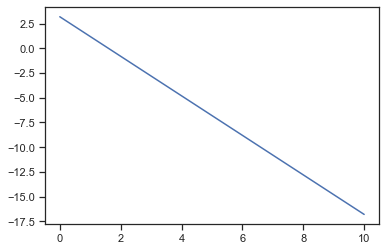

In [103]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

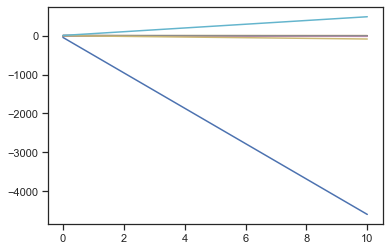

In [104]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

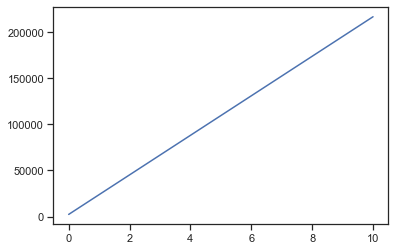

In [105]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [106]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

Application of LS and LMS methods on the data, codes and the results are discussed below.

### Description

The experiment is performed using Least Squares and Least Mean Squares methods on the data set. The train function trains the input x and produces the desired output by generating appropriate weights. LS uses train function to train the entire data set and LMS trains step by step for each data entry. 

For the given dataset, we have firstly partitioned the data for training and testing purposes. From that data we have trained our model for LS and LMS and gained the desired output. 

The visualization of the predicted and actual output is shown below in the graphs. For the first graph of LS, color Blue is the actual output and orange is the predicted output. For the second graph of LMS, color Magenta is the actual output and green is the predicted output. We can see the deviation from the actual values clearly in the graph. We have also seen the RMSE i.e Root mean squared error values for both of them and the error in LMS is lesser in comparision to LS, thus giving efficient results. 

### Code

#### Partitioning the Datasets

In [107]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

#### Least Squares

In [108]:
InputX = dfReg.drop(columns=['RMSD','F4', 'F6'])
TargetT = dfReg.iloc[:, 0:1]

InputVal, TargetVal = partition(InputX, TargetT)

Xtrain, Xtest = [xx.as_matrix() for xx in InputVal]
Ttrain, Ttest = [tt.as_matrix() for tt in TargetVal]

ls = LinearRegress()

ls.train(Xtrain, Ttrain)

y = ls.use(Xtest)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [109]:
rmse(Ttest, y)

537.53089434469

#### Least Mean Squares

In [110]:
InputX = dfReg.drop(columns=['RMSD','F4', 'F6'])
TargetT = dfReg.iloc[:, 0:1]

InputVal, TargetVal = partition(InputX, TargetT)

LMSXtrain, LMSTtrainX = [xx.as_matrix() for xx in InputVal]
LMSTtrain, LMSTtest = [tt.as_matrix() for tt in TargetVal]

lms = LMS(0.001)

lms.train(LMSXtrain, LMSTtrain)

lms_y = ls.use(LMSXtest)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in matmul
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in subtract


### Visualization of Results

#### Least Squares

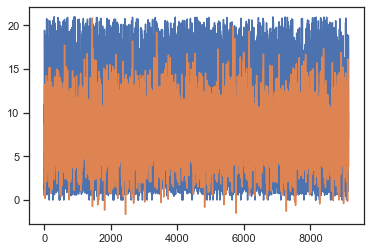

In [111]:
plt.plot(Ttest)
plt.plot(y)

Blue - Actual Output <br/>
Orange - Predicted Output

#### Least Mean Squares

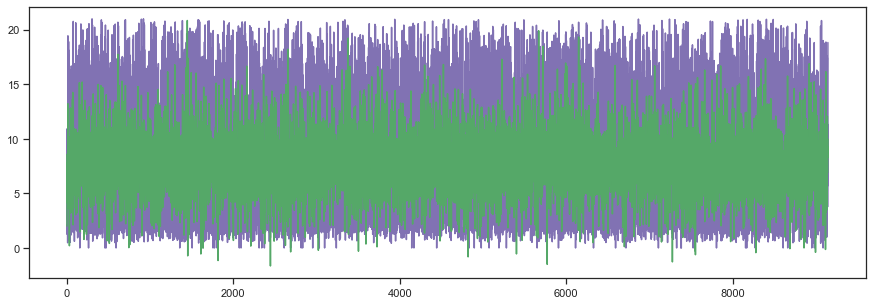

In [112]:
plt.figure(figsize=(15,5))
plt.plot(LMSTtest,color='m')
plt.plot(lms_y, color='g')

Magenta - Actual Output <br/>
Green - Predicted Output

### Comparision of Algorithms

The two algorithms named Least Squares (LS) and Least Mean Squares (LMS) are used here in linear regression model. 
The main difference between the two algorithms is that Least Squares consider the entire data set for processing and generates output considering the entire data. Where as in Least Mean Squares, it follows Online learning which is step by step learning. In least mean squares from the entire data set, an instance is considered at a time. From the value of the past output, it learns and makes predictions for the next output one after the other unlike LS, where entire data is considered.

We have also seen from the algorithm that LS uses train and use function where weight is calculated using the LS formula and in LMS we have two weights one for the current (k) and one for the next (k+1) instance. In LMS, weight is randomized at first and calculated then after.

From the plots we can figure out that for such big data sets, the accuracy for Least mean squares is higher in comparison to least squares. The deviation from the actual value is more in least squares graph comparatively. Also, the root mean sqauare error (RMSE) value, that predicts the error or deviation of the predicted value from the actual value is more in LS (537.5) compared to LMS (259.5). Thus for both the algorithms the efficiency and working variates on the way we train our data sets.


# Conclusions

The Assignment for linear Regression had so many learnings from it. It had made clear understanding of how linear regression models work in supervised learning. Apart from the theoratical knowledge on how the algorithms and formulas are designed, a proper implementation knowledge of the models has been gained. Choosing the appropriate model for appropriate data set has been considered like for large data sets LMS is effective as it considers Online learning. 

Right from plotting the raw data to prepossing it, we can find the changes and accuracy in the data once it is cleaned. Removing null values, dimentionality reduction, feature scaling and all plays an important role in the processing of the data and the outcomes generated from it.

Least Squares and Least Mean squares are the two methods that show proper usage of fitting a linear line to our data so that our predicted output and the actual output are close enough. A cost function is used which will minimise the distance of the line points from the actual points and thus give us a better output. LS uses the entire data set and plots the line accordingly where as LMS uses online learning i.e step by step learning and learns each time from the previous step before generating output for the next step.

We also learned about the efficiency of both algorithms by comparing the RMSE values and using different methods to train and test our data set.

# References

1. Prashant Singh Rana, ABV - Indian Institute of Information Technology & Management, Gwalior, MP, India

2. “Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/Assign0.ipynb

3. “Creating Annotated Heatmaps.” Creating Annotated Heatmaps - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html.

4. “Seaborn.pairplot.” Seaborn.pairplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.pairplot.html.

5. “Seaborn.lmplot.” Seaborn.lmplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.lmplot.html.

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 